# Analysis of the generated signals power spectrums

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import csv

In [9]:
true_freqs = {
    'f0': 0.27618179942547216,
    'f1': 0.45362088183519916,
    'f2': 0.7005994389758473,
    'f3': 0.5181010200169635,
    'f4': 0.6760433094646843,
    'f5': 0.41860832855463775,
    'f6': 0.37258167625880556,
    'f7': 0.4681378967076092,
    'f8': 0.5487997322439953
}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

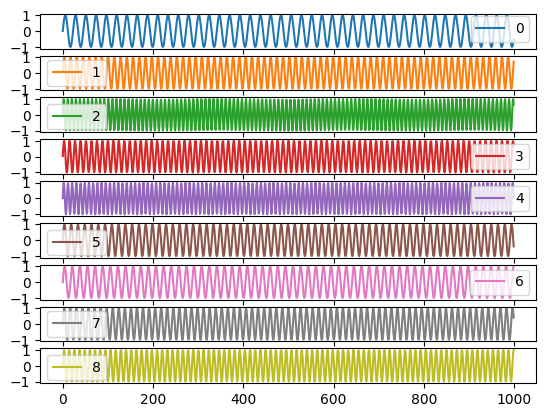

In [3]:
# Loading original data
with open('sine_data/sine_123_1000_9.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

float_data = np.array(data[1:], dtype=float)

ori_df = pd.DataFrame(float_data)
ori_df.plot(subplots=True)
# ori_data = []
# for i in range(1, len(data)):
#     ori_data.append(float(data[i]))

# np_ori_data = np.array(ori_data)

In [5]:


def find_freqs(signal_df):
    estimated_freqs = {}
    cnt = 0

    for col in signal_df.columns:
        np_signal = np.array(signal_df[col])
        rate = 1
        ps = np.abs(np.fft.fft(np_signal))**2

        time_step = 1 / rate
        freqs = np.fft.fftfreq(np_signal.size, time_step)
        idx = np.argsort(freqs)
        sorted_freqs = freqs[idx]

        if np.abs(sorted_freqs[np.argmax(ps[idx])]) == 0:
            # print(f'Strongest frequency is 0')
            zero_index = np.where(freqs == 0)
            ps[zero_index] = 0

        # df = pd.DataFrame(
        #     {'freqs': freqs[idx],
        #     'ps': ps[idx]
        #     })

        # px.line(df,'freqs', 'ps')
        freq = np.abs(sorted_freqs[np.argmax(ps[idx])])
        # print(freq)
        ang_freq = 2*np.pi*freq
        estimated_freqs[f'f{cnt}'] = ang_freq
        # print(f'Estimated angular frequency of f{cnt}: {ang_freq}')
        cnt +=1
    return estimated_freqs

estimated_freqs = find_freqs(ori_df)



In [11]:
def estimation_deviations(true_freqs, estimated_freqs):
    devs = []
    if len(estimated_freqs.values()) == 2:
        devs.append(round(100*np.abs(estimated_freqs['f1'] - true_freqs['f1'])/true_freqs['f1'], 2))
    else:
        for key, value in estimated_freqs.items():
            devs.append(round(100*np.abs(value - true_freqs[key])/true_freqs[key], 2))
    return devs

print(estimation_deviations(true_freqs, estimated_freqs))

[0.1, 0.27, 0.44, 0.56, 0.38, 0.56, 0.5, 0.66, 0.39]


In [6]:
with open('synt_data/timeGan_generated_sines/syn_sine_50000_6_25_250424_07h20.json', 'r') as file:
    dim6_50000 = json.load(file)
df_dim6_50000 = pd.DataFrame(dim6_50000[0])

with open('synt_data/timeGan_generated_sines/syn_sine_50000_4_200_290424_10h40.json', 'r') as file:
    dim4_50000_200 = json.load(file)
df_dim4_50000_200 = pd.DataFrame(dim4_50000_200[0])



estimate_4d_200 = find_freqs(df_dim4_50000_200)
estimation_deviations(true_freqs, estimate_4d_200)

f0: 2.38%
f1: 3.88%
f2: 3.14%
f3: 3.08%


## Loop through all generated files and find deviations in frequency

In [12]:
import os
directory = os.path.join(os.curdir, "synt_data", "timeGan_generated_sines")
results = {'1': [], '2': [], '4':[], '6':[], '9':[]}

for name in os.listdir(directory):
    # Open file
    with open(os.path.join(directory, name)) as f:
        gen_sines = json.load(f)
        df_gen_sines = pd.DataFrame(gen_sines[0])
        # print(f'Deviations for file: {name}')
        name_list = name.split("_")
        # print(name_list)
        freq_est = find_freqs(df_gen_sines)
        ests = estimation_deviations(true_freqs, freq_est)
        if name_list[4] == '200':
            results[name_list[3]].append([f'200_{name_list[2]}', ests])
        else:
            results[name_list[3]].append([f'25_{name_list[2]}', ests])



In [18]:
for key, val in results.items():
    print(f'Average deviation for {key}d generations')
    for el in val:
        print(f'Parameters (seq_len n_iterations): {el[0]}, avg. dev: {np.mean(el[1])}%')

Average deviation for 1d generations
Parameters (seq_len n_iterations): 25_1000, avg. dev: 44.6%
Parameters (seq_len n_iterations): 25_50000, avg. dev: 44.6%
Parameters (seq_len n_iterations): 25_10000, avg. dev: 44.6%
Parameters (seq_len n_iterations): 200_50000, avg. dev: 37.67%
Parameters (seq_len n_iterations): 200_1000, avg. dev: 9.97%
Parameters (seq_len n_iterations): 200_10000, avg. dev: 37.67%
Average deviation for 2d generations
Parameters (seq_len n_iterations): 200_1000, avg. dev: 3.04%
Parameters (seq_len n_iterations): 200_50000, avg. dev: 3.04%
Parameters (seq_len n_iterations): 25_50000, avg. dev: 10.81%
Parameters (seq_len n_iterations): 25_1000, avg. dev: 10.81%
Parameters (seq_len n_iterations): 25_10000, avg. dev: 10.81%
Parameters (seq_len n_iterations): 200_10000, avg. dev: 3.04%
Average deviation for 4d generations
Parameters (seq_len n_iterations): 25_50000, avg. dev: 7.602500000000001%
Parameters (seq_len n_iterations): 200_10000, avg. dev: 53.4375%
Parameters 

In [17]:
print(results)

{'1': [['25_1000', [44.6]], ['25_50000', [44.6]], ['25_10000', [44.6]], ['200_50000', [37.67]], ['200_1000', [9.97]], ['200_10000', [37.67]]], '2': [['200_1000', [3.04]], ['200_50000', [3.04]], ['25_50000', [10.81]], ['25_1000', [10.81]], ['25_10000', [10.81]], ['200_10000', [3.04]]], '4': [['25_50000', [9.0, 10.81, 7.62, 2.98]], ['200_10000', [13.75, 107.77, 10.32, 81.91]], ['25_1000', [82.0, 44.6, 28.25, 51.49]], ['25_10000', [9.0, 44.6, 7.62, 2.98]], ['200_50000', [2.38, 3.88, 3.14, 3.08]], ['200_1000', [2.38, 24.66, 16.59, 57.66]]], '6': [['200_1000', [104.75, 24.66, 34.52, 9.15, 16.35, 35.09]], ['200_50000', [25.13, 218.58, 3.14, 27.24, 6.88, 9.94]], ['25_1000', [264.0, 121.62, 43.49, 94.04, 48.7, 140.16]], ['25_10000', [9.0, 44.6, 64.13, 2.98, 25.65, 20.08]], ['25_50000', [9.0, 10.81, 7.62, 2.98, 11.53, 20.08]], ['200_10000', [1014.76, 578.71, 339.45, 494.24, 355.41, 635.48]]], '9': [['25_10000', [9.0, 10.81, 7.62, 45.53, 11.53, 20.08, 34.91, 46.31, 8.41]], ['25_1000', [82.0, 10.